# Predict the Insurance Fee Using the Python


### 01. Importing the Library
---

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import missingno

from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

from sklearn.metrics import r2_score
import warnings

### 02. Data Processing and EDA
---

####  [EDA Checklist]
#### This checklist serves as a guide for conducting exploratory data analysis and preparing the data for further analysis or modeling. It helps you identify issues, patterns, and relationships within the data.
---
1. What questions are you trying to answer or prove wrong?
2. Are there any duplicated items in the data?
3. What types of data are present, and how do you plan to handle different data types?
4. Is there missing data in the dataset, and if so, how do you plan to handle it?
5. Where are the outliers, and are they of interest to your analysis?
6. Are there correlations between variables?
---

In [3]:
# Importing the pandas library and reading a CSV file named "Premium.csv"
import pandas as pd
data = pd.read_csv("premium.csv")

# Printing the shape of the Premium data
print("The Premium data shape is ", data.shape)

# Displaying the first 10 rows of the data
display(data.head(10))


The Premium data shape is  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Using the data.describe() function to provide a statistical summary of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,13270.422265
std,14.049960,6.092785,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Checking the data's type and missing Value in the data  

In [5]:
# Using the data.info() function to provide an overview of the dataset's structure and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Check the duplicated rows of the data and cardinality with columns

In [6]:
# Using the data.duplicated() function to check for duplicated rows in the dataset
duplicates = data.duplicated()

# Displaying the result of duplicated rows in a user-friendly format
display(duplicates)

# Counting and printing the number of duplicated rows in the dataset
print("Duplicated Rows: ", len(data[data.duplicated()]))


0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

Duplicated Rows:  1


In [7]:
# Removing duplicated rows from the dataset and keeping the first occurrence of each duplicated row
data.drop_duplicates(keep='first', ignore_index=True, inplace=True)

# Counting and printing the number of duplicated rows in the dataset (should be 0 now)
print("Duplicated Rows: ", len(data[data.duplicated()]))

# Printing the shape of the updated dataset, which reflects the removal of duplicated rows
print(data.shape)


Duplicated Rows:  0
(1337, 7)


#### Check the Missing value and remove it.

In [8]:
# Count and print the number of missing values for each column in the dataset
count_na = data.isna().sum()
print(count_na[count_na > 0])

bmi    5
dtype: int64


<AxesSubplot: >

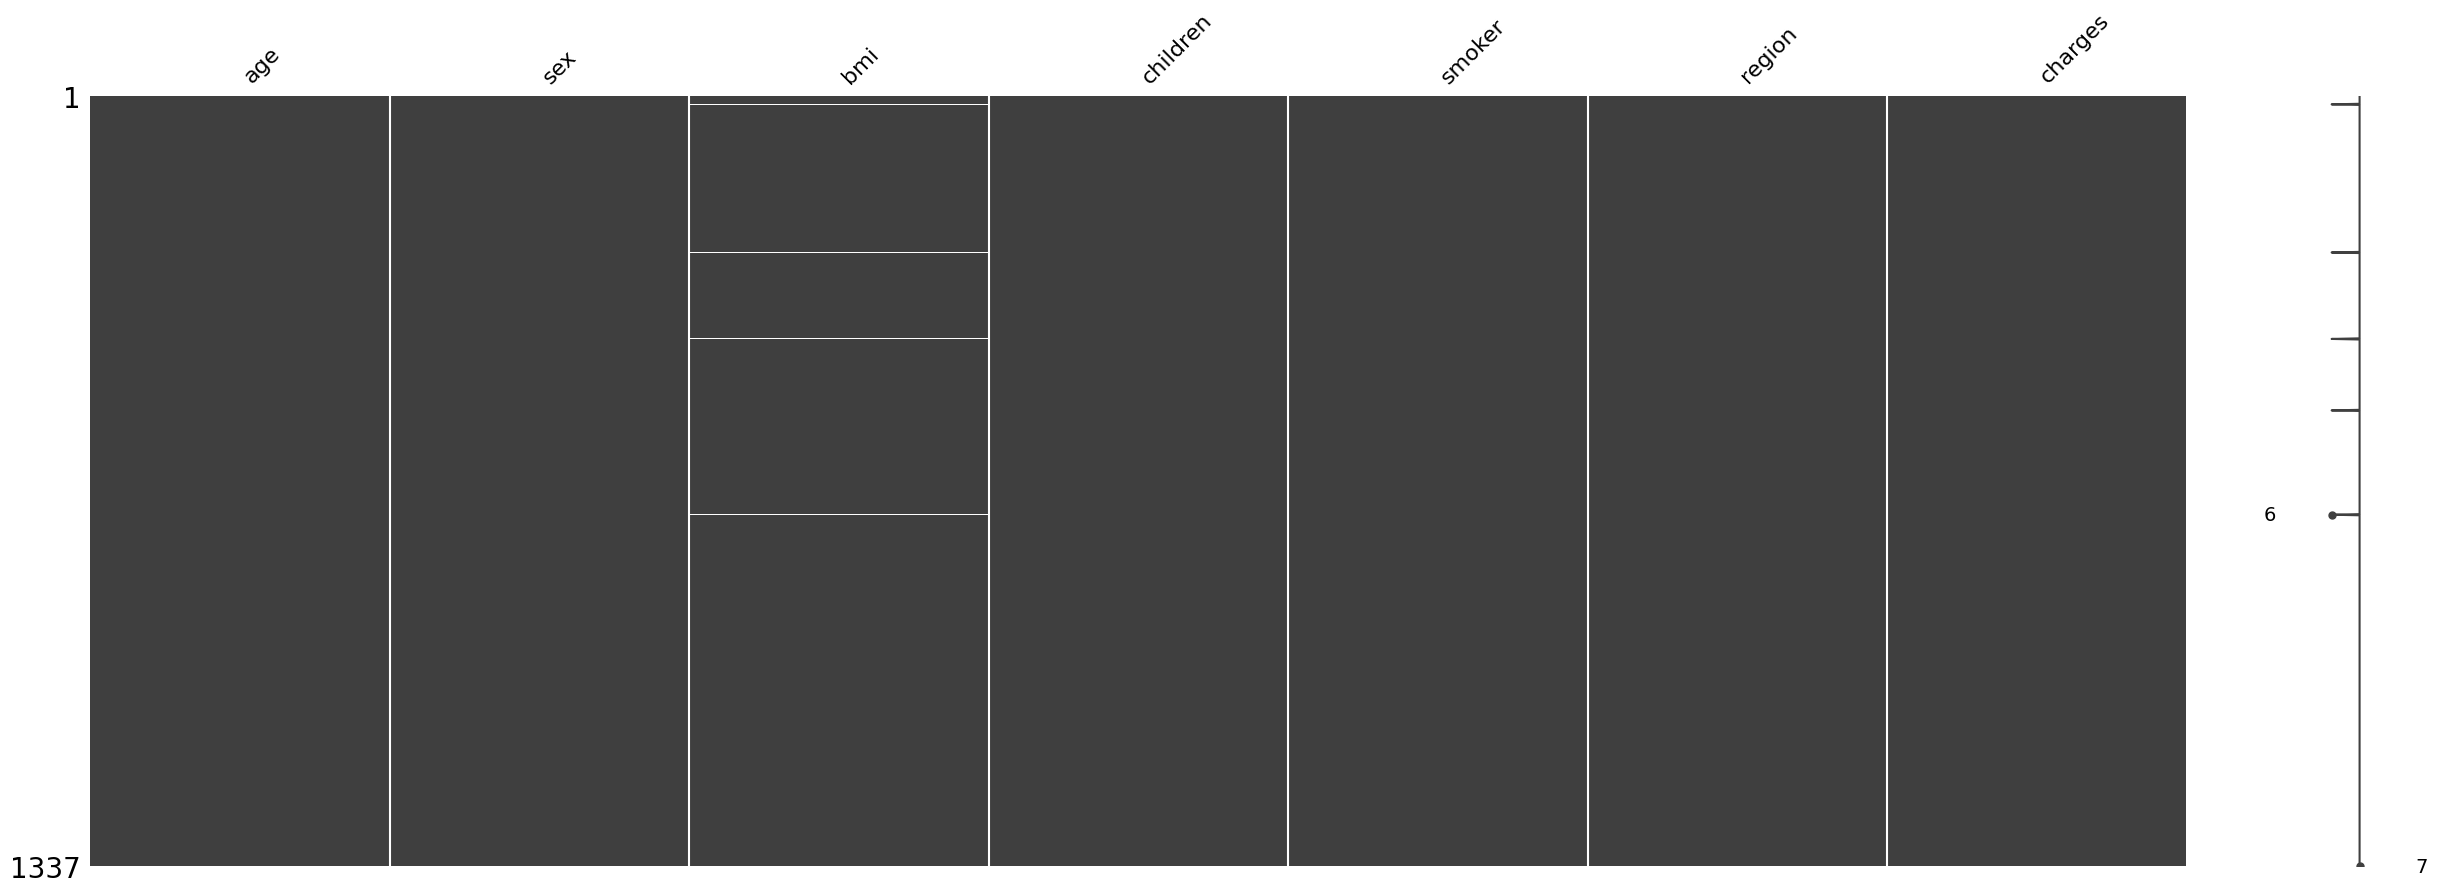

In [9]:
# Visualize missing values using the missingno package and set the figure size
missingno.matrix(data, figsize=(30, 10))

<AxesSubplot: >

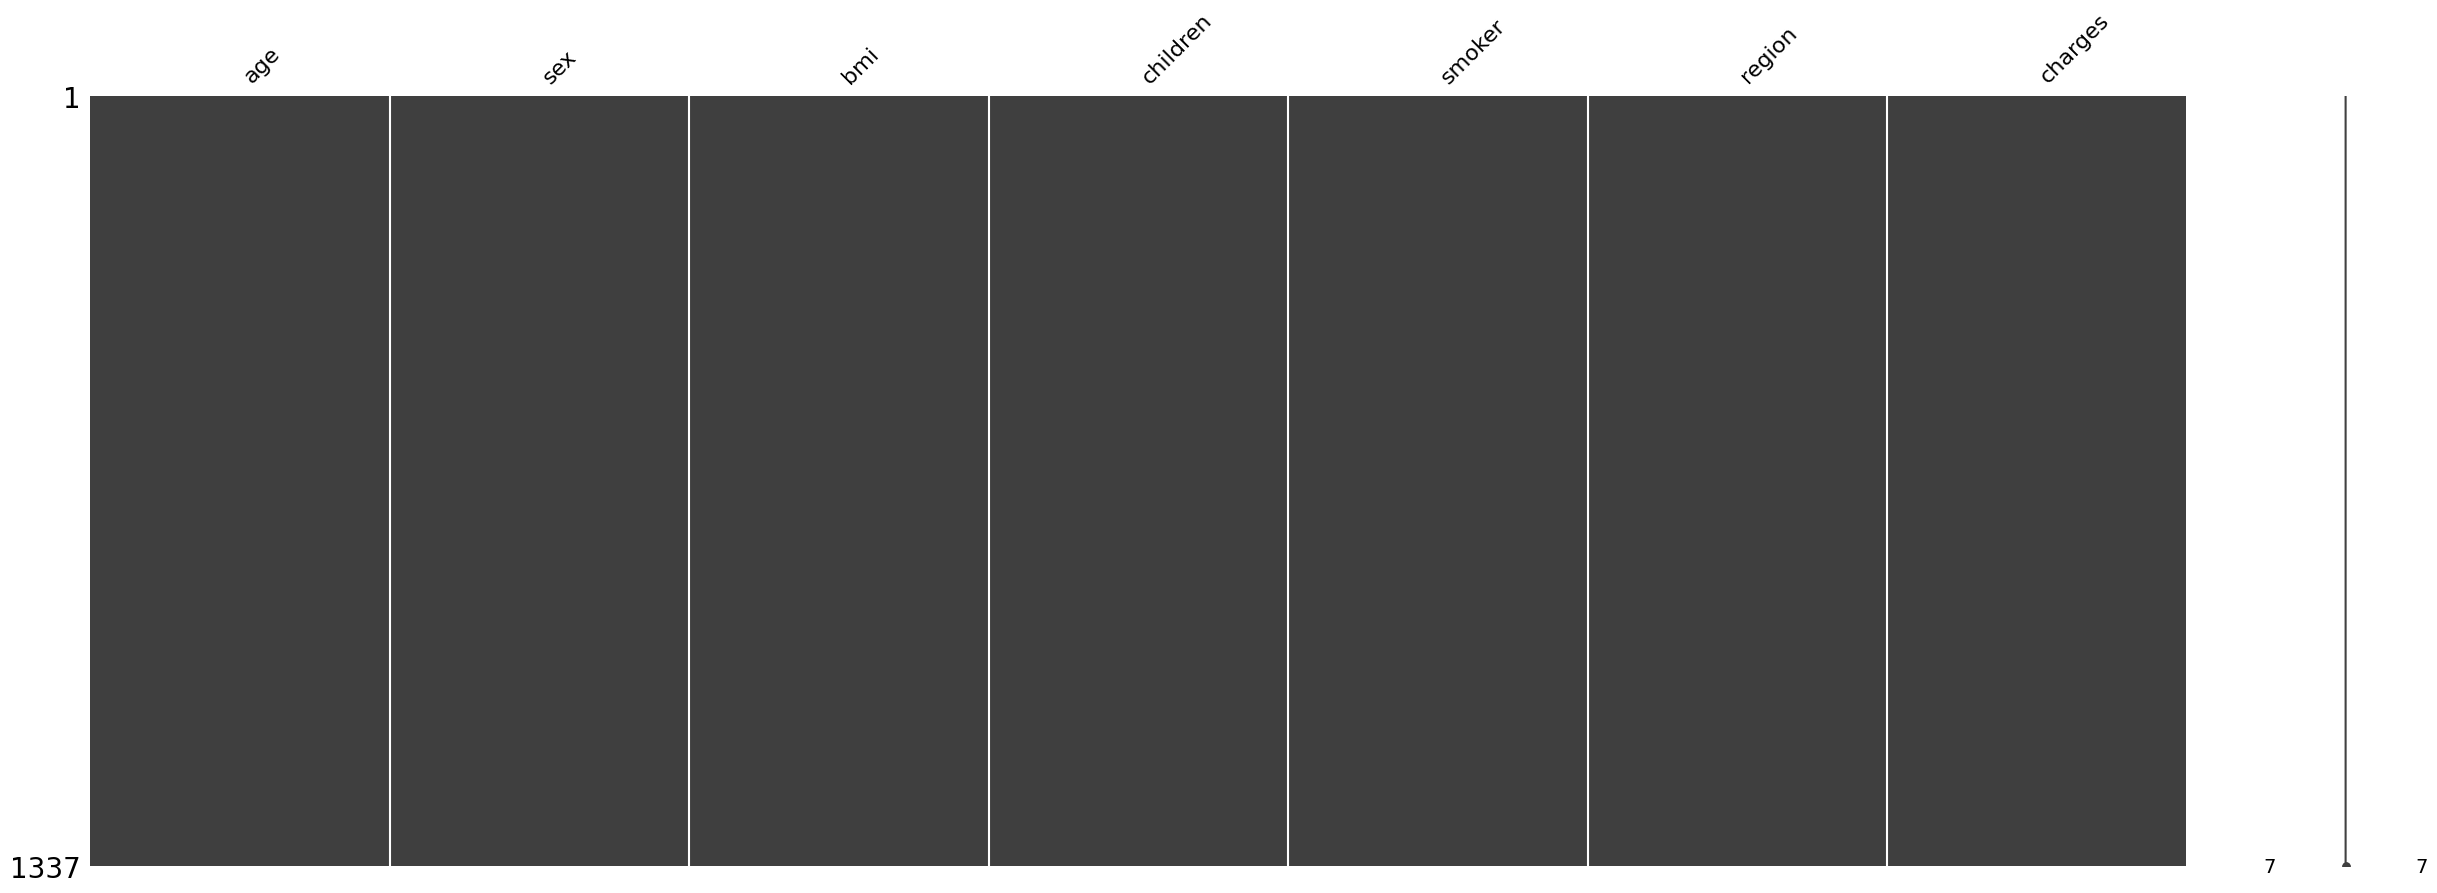

In [10]:
# Fill missing values in the 'bmi' column with the mean value of that column
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Visualize missing values after filling missing values
missingno.matrix(data, figsize=(30, 10))


#### Visualizing the categorical columns

In [11]:
# Identify and store the names of categorical columns (columns with data type 'object' or 'category')
categorical_col = [col for col in data.columns if data[col].dtypes in ["object", "category"]]

# Print the list of categorical columns
print("Categorical columns: ", categorical_col)

# For each categorical column, print the column name and its value counts
for col in categorical_col:
    print("The Column Name : ", col)
    print(data[col].value_counts(), "\n")


Categorical columns:  ['sex', 'smoker', 'region']
The Column Name :  sex
male      675
female    662
Name: sex, dtype: int64 

The Column Name :  smoker
no     1063
yes     274
Name: smoker, dtype: int64 

The Column Name :  region
southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64 



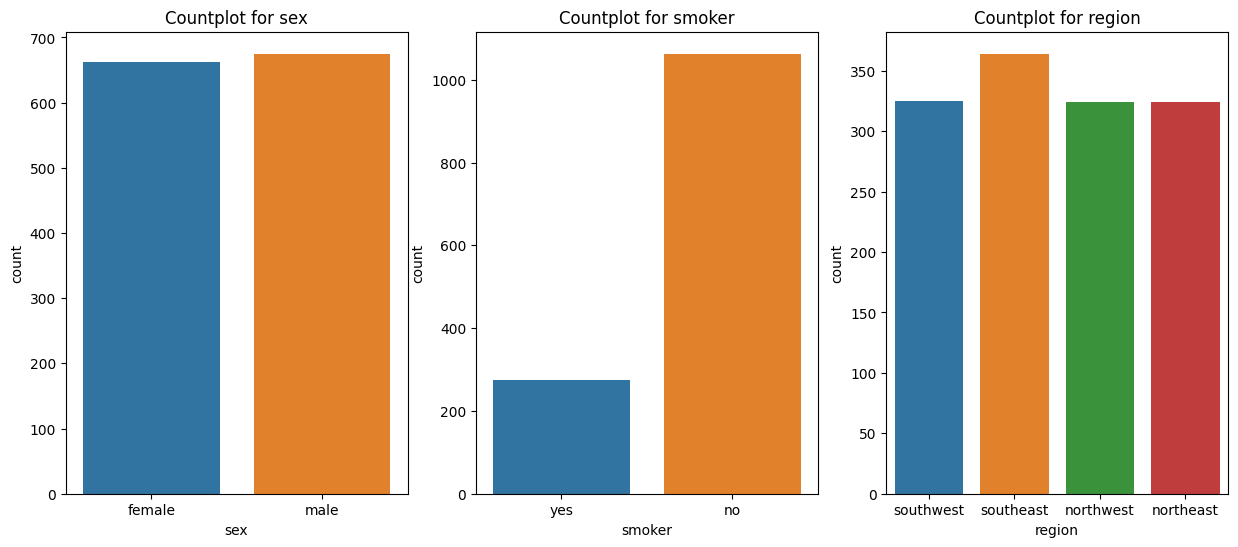

In [12]:
# Define the number of rows and columns in the subplots grid
num_cols = len(categorical_col)
num_rows = 1

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))

# Iterate over the categorical columns and create a count plot for each
for i, col in enumerate(categorical_col):
    # Set the row and column index
    row_idx = 0  # Since you have only one row
    col_idx = i
    ax = axes[col_idx]  # Updated indexing

    # Create a count plot using seaborn for the current categorical column
    sns.countplot(data=data, x=col, ax=ax)

    # Set the title of the count plot
    ax.set_title(f"Countplot for {col}")

# Show the count plots
plt.show()


#### Check the Outlier with numerical columns' skewness and boxplot

In [14]:
# Select columns with numerical data types (e.g., int or float)
numeric_data = data.select_dtypes(include=[np.number])

# Store the column names of the selected numerical columns
numeric_data_cols = numeric_data.columns

# Display the column names of the numerical columns
numeric_data_cols


Index(['age', 'bmi', 'children', 'charges'], dtype='object')

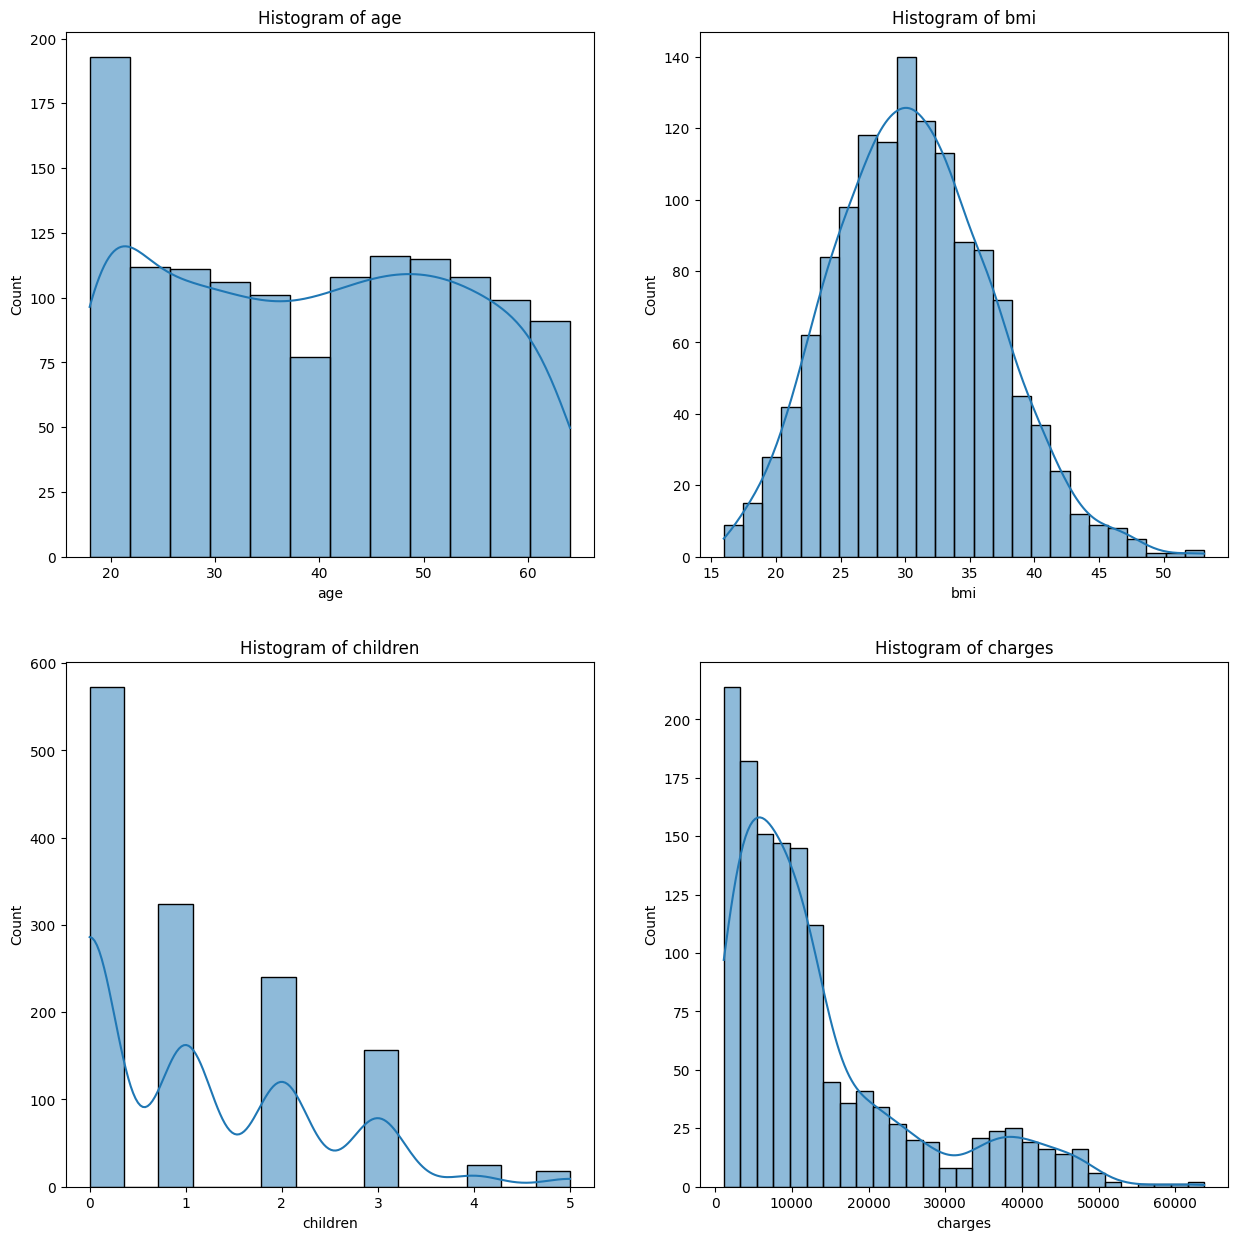

In [15]:
# Get the column names of the selected numerical columns
numeric_data_cols = numeric_data.columns

# Calculate the number of subplots, number of columns, and number of rows
num_subplots = len(numeric_data_cols)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_subplots + 1) // 2  # Calculate the number of rows

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate over the numerical columns and create histograms
for i, col_name in enumerate(numeric_data_cols):
    row, col = divmod(i, num_cols)  # Determine the row and column indices for the current subplot
    ax = axes[row, col]  # Get the current subplot

    # Create a histogram using seaborn for the current numerical column with a kernel density estimate (KDE)
    sns.histplot(data=numeric_data, x=col_name, kde=True, ax=ax)

    # Set the title of the histogram
    ax.set_title(f'Histogram of {col_name}')

# Show the subplots with histograms
plt.show()


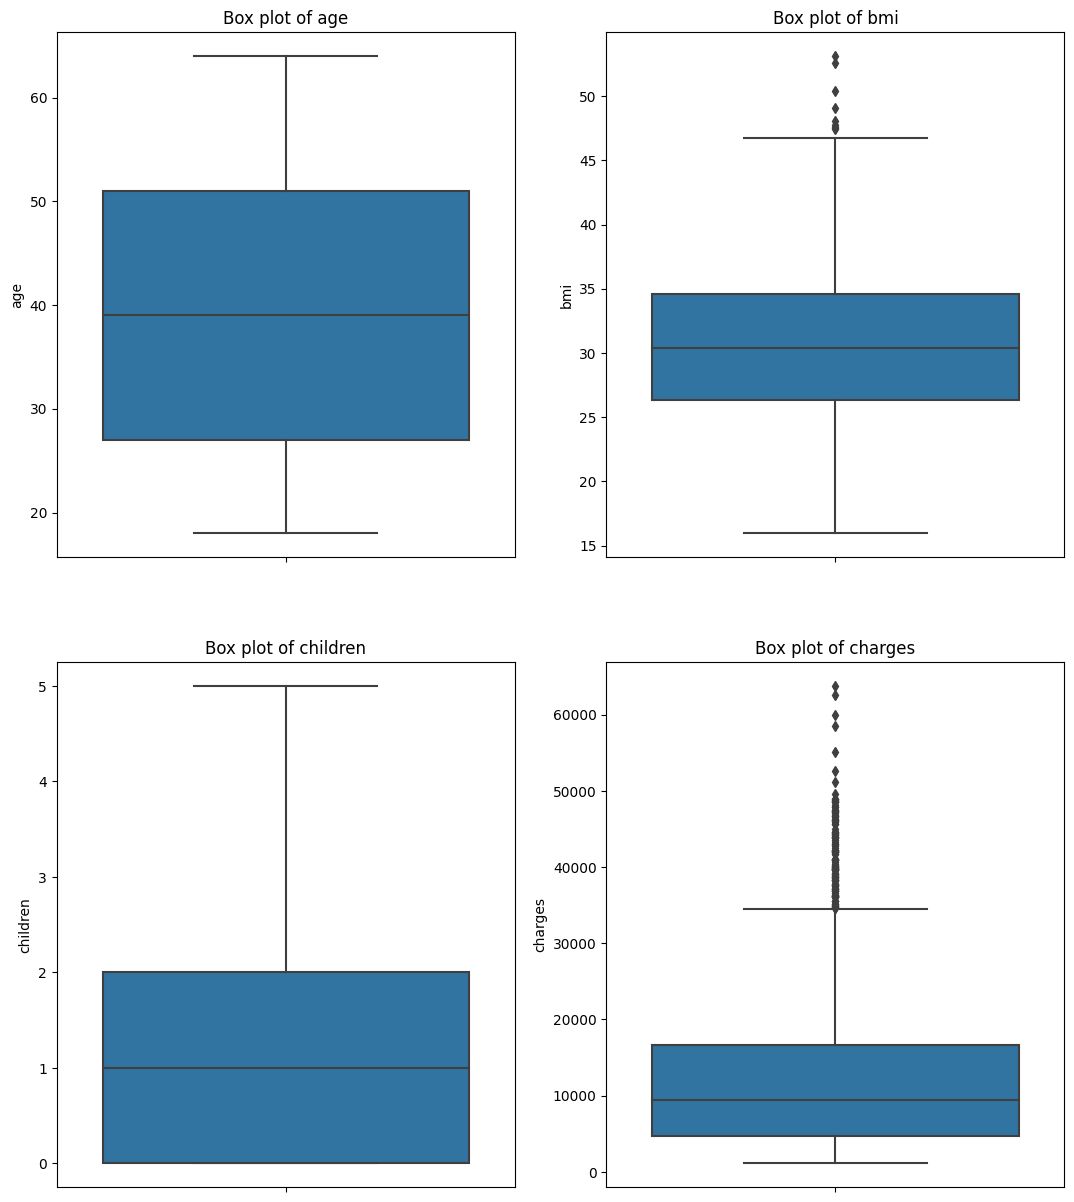

In [16]:
# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 15))

# Iterate over the numerical columns and create box plots
for i, col_name in enumerate(numeric_data_cols):
    row, col = divmod(i, num_cols)  # Determine the row and column indices for the current subplot
    ax = axes[row, col]  # Get the current subplot

    # Create a box plot using seaborn for the current numerical column
    sns.boxplot(data=numeric_data, y=col_name, ax=ax)

    # Set the title of the box plot
    ax.set_title(f'Box plot of {col_name}')

# Show the subplots with box plots
plt.show()


#### Visualizing Violin Plots by Categorical Data

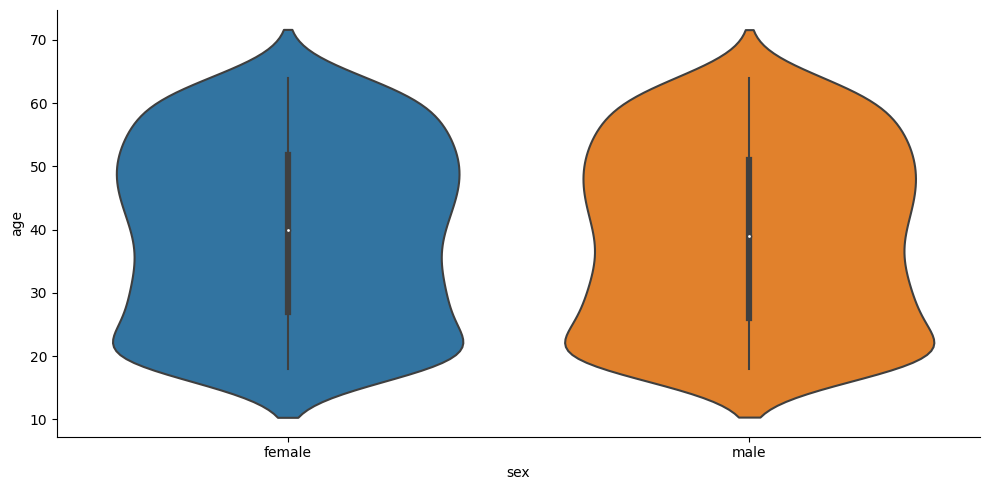

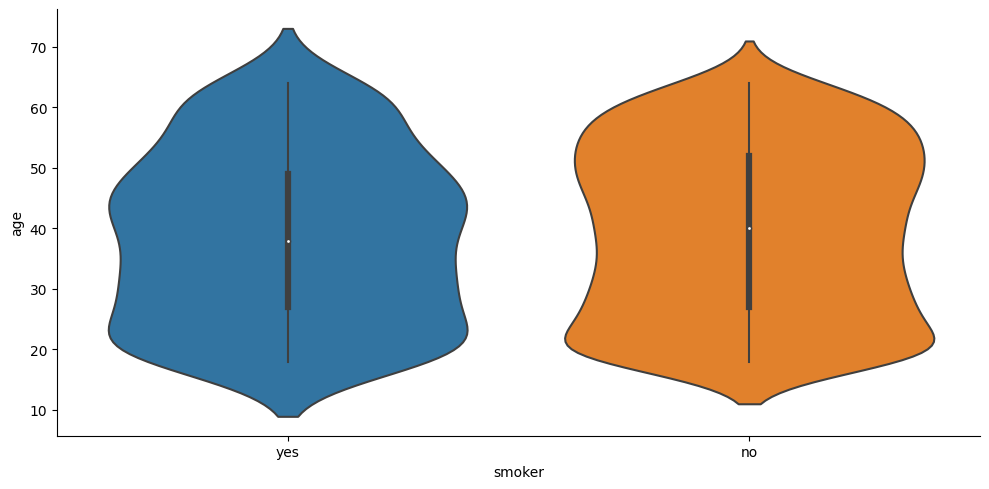

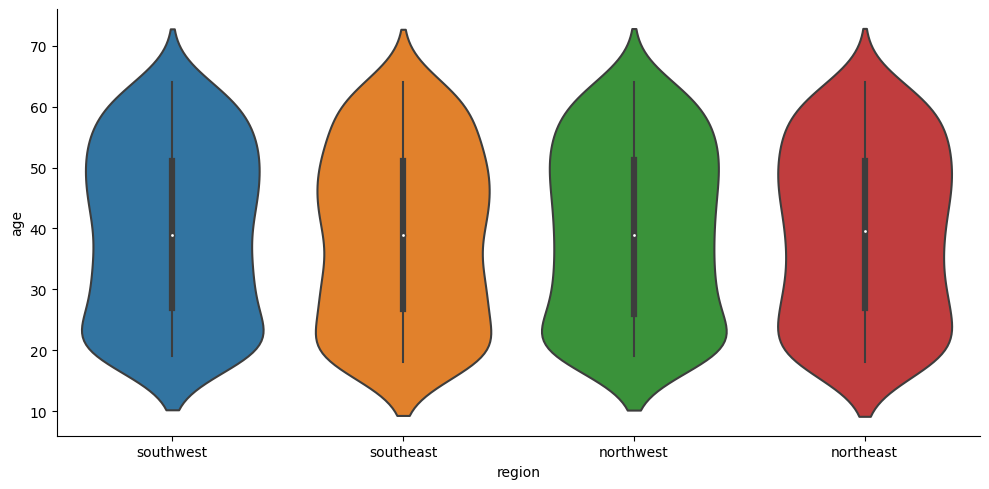

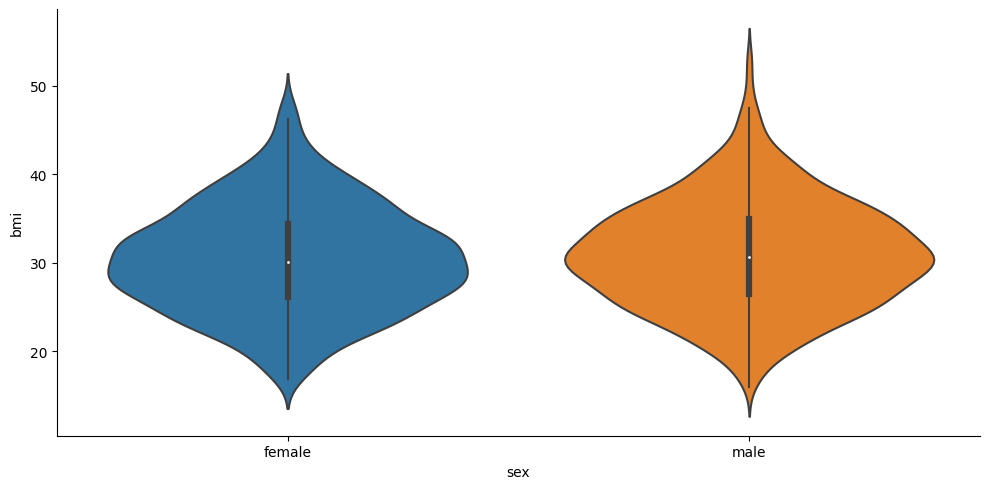

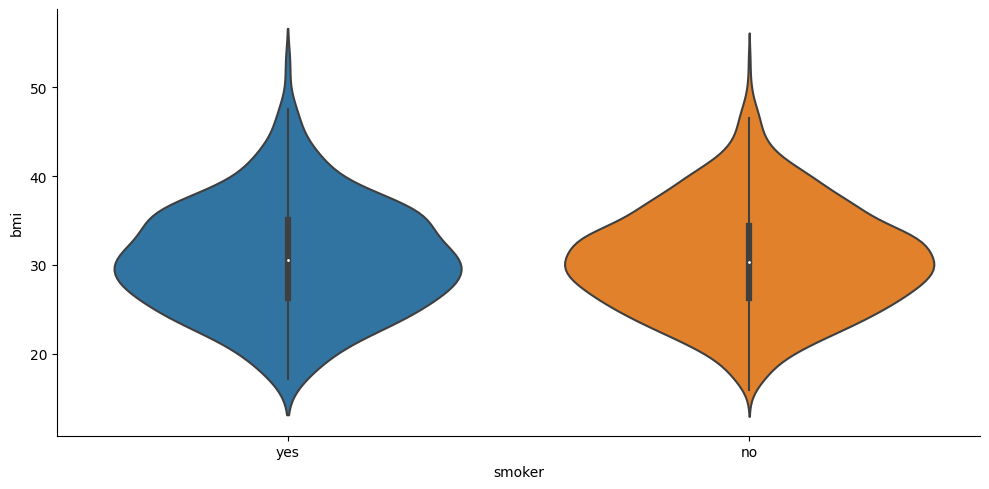

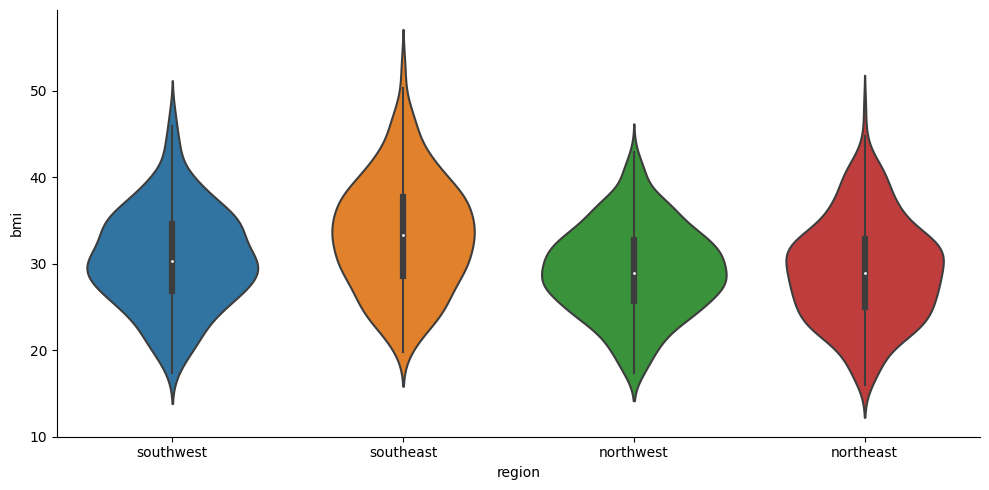

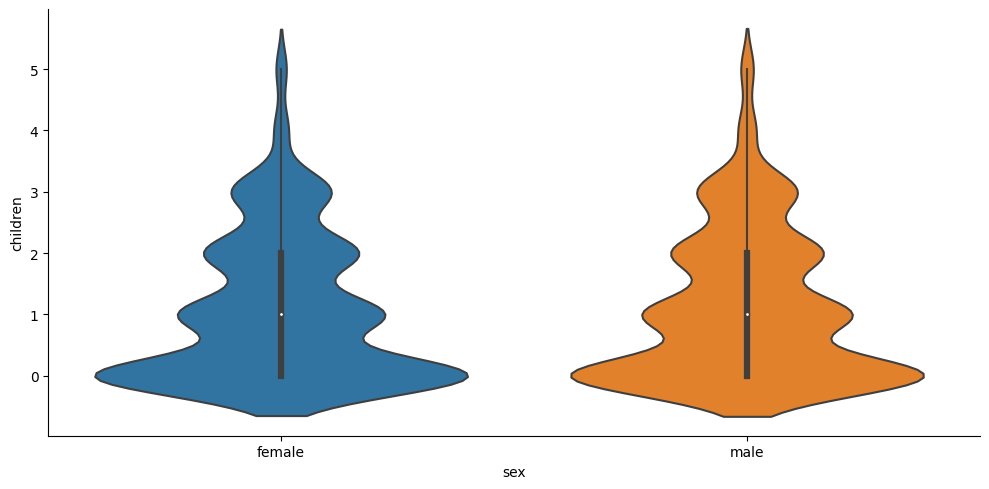

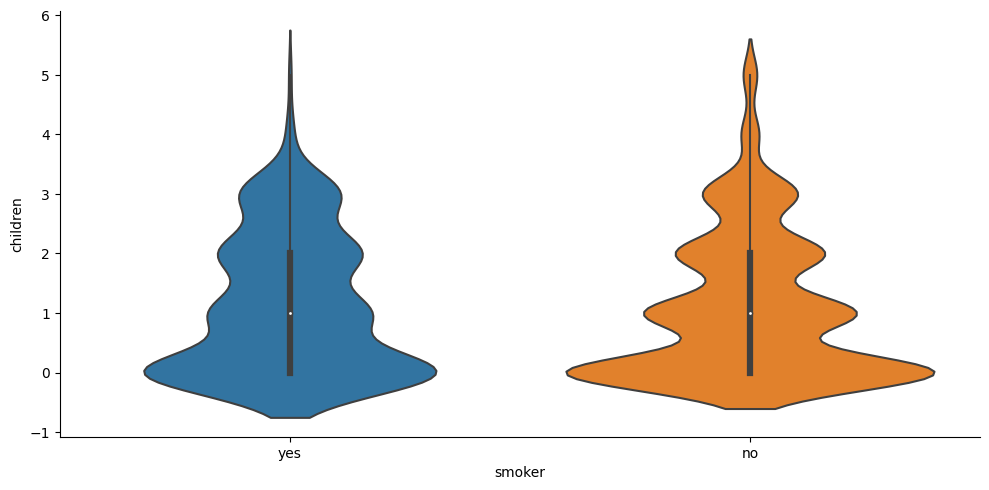

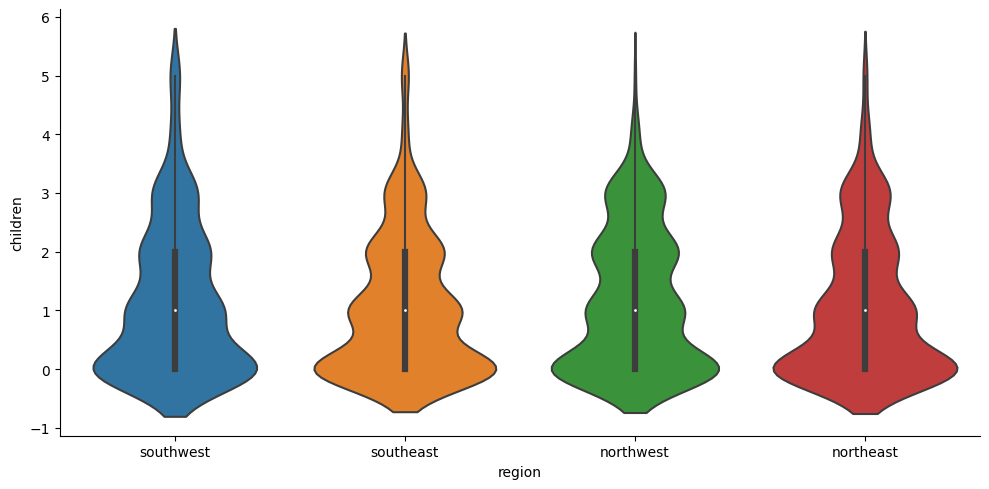

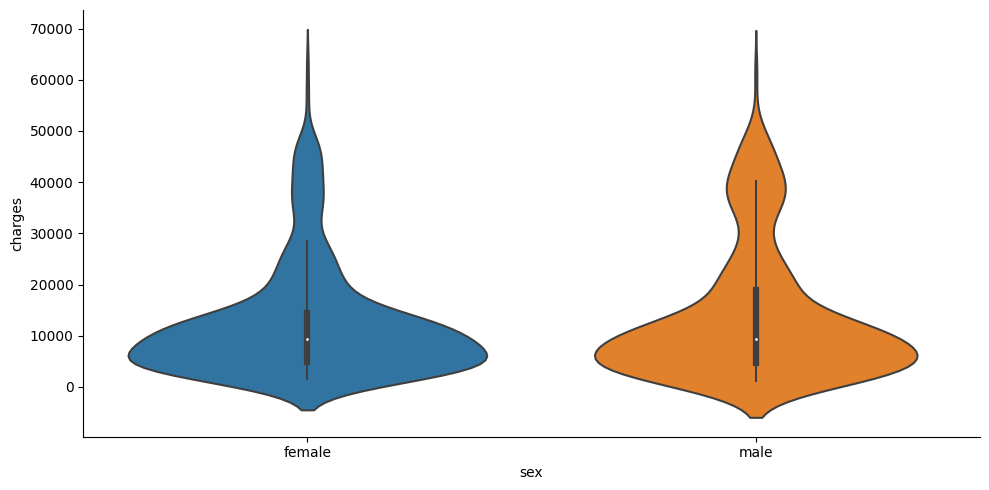

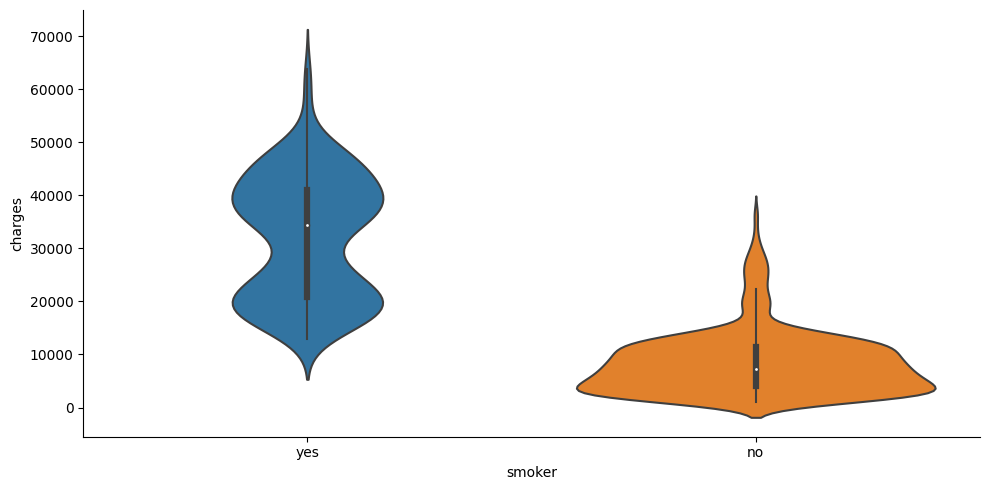

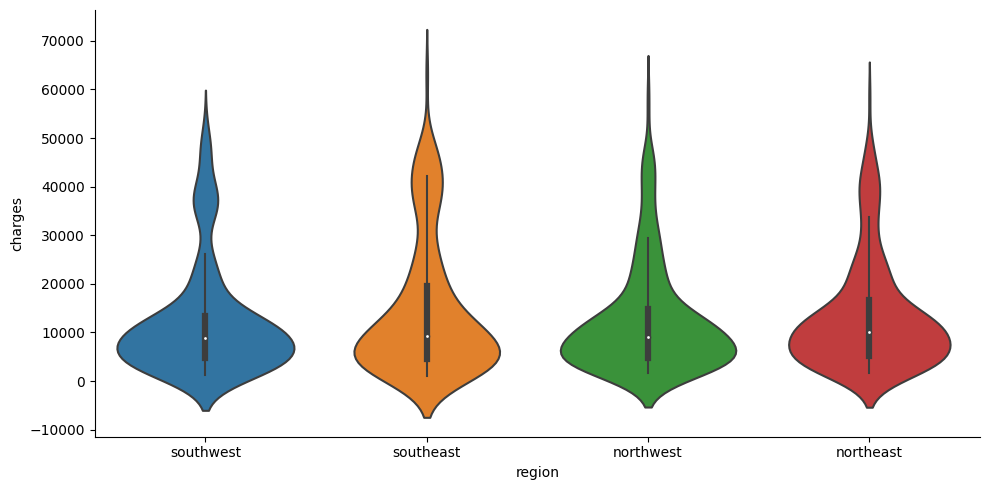

In [17]:
# Loop through each numerical column and each categorical column
for col_num in numeric_data_cols:
    for col in categorical_col:
        # Create a violin plot using seaborn to visualize the relationship between the current numerical and categorical columns
        fig = sns.catplot(x=col, y=col_num, kind='violin', data=data, height=5, aspect=2)
        plt.show()


#### Visualizing the correlation between numerical columns using a heatmap


C:\Users\sjy99\AppData\Local\Temp\ipykernel_12652\2801758238.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = data.corr().nlargest(k, 'charges')['charges'].index


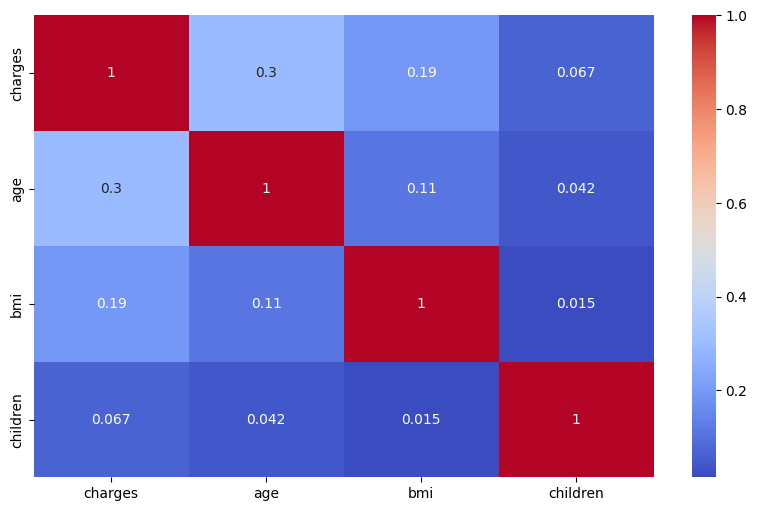

In [18]:
# Number of variables to be checked in the heatmap
k = 4

# Identify the top 4 variables with the highest correlation to the 'charges' variable
cols = data.corr().nlargest(k, 'charges')['charges'].index

# Calculate the correlation matrix for the selected variables
cm = data[cols].corr()

# Create a figure for the heatmap with a specified size
plt.figure(figsize=(10, 6))

# Generate a heatmap using seaborn with annotations and the 'coolwarm' colormap
sns.heatmap(cm, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


#### Creating a pair plot between numeric columns.

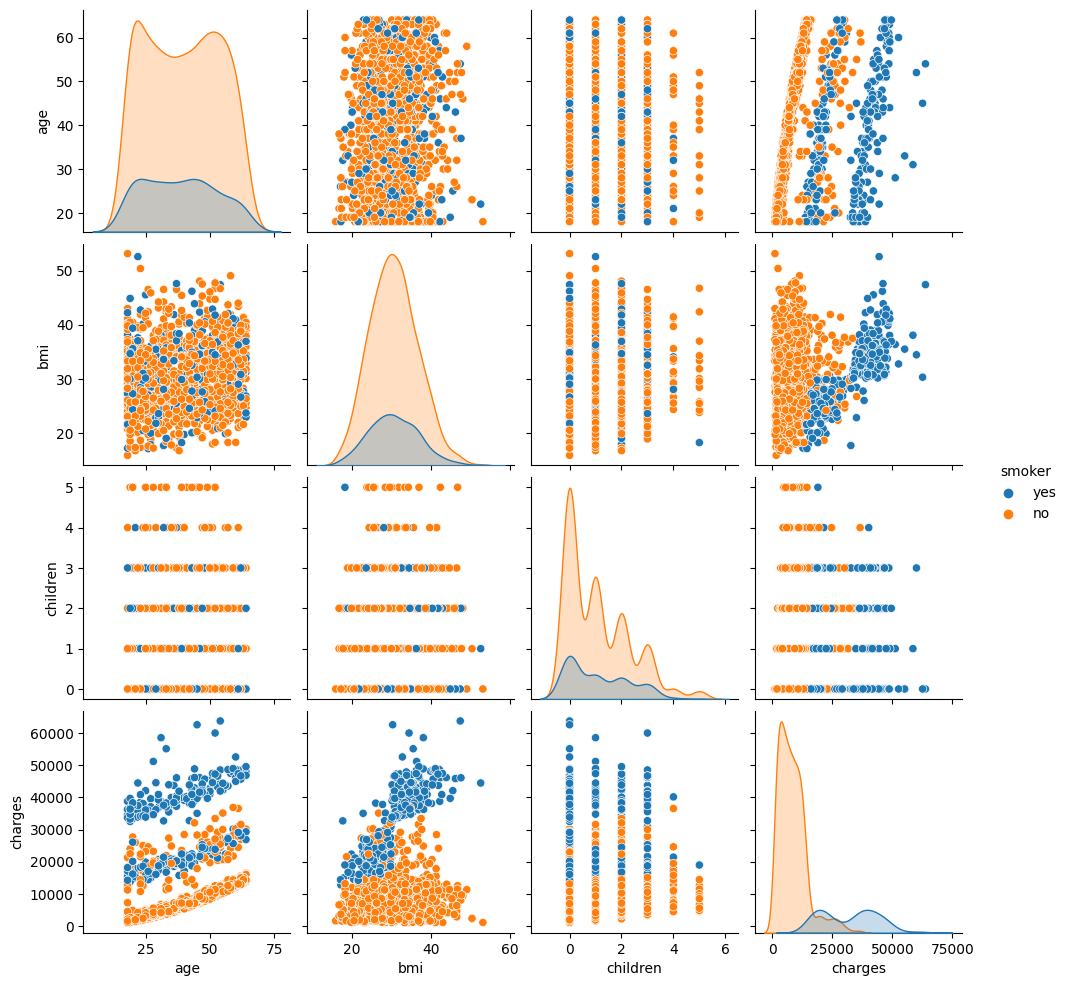

In [19]:
# Define the variable for color-coding
hue = 'smoker'

# Create a pairplot to visualize pairwise relationships in the numeric_data DataFrame while using 'hue' for color-coding
sns.pairplot(numeric_data.join(data[[hue]]), hue=hue)

# Display the pairplot
plt.show()


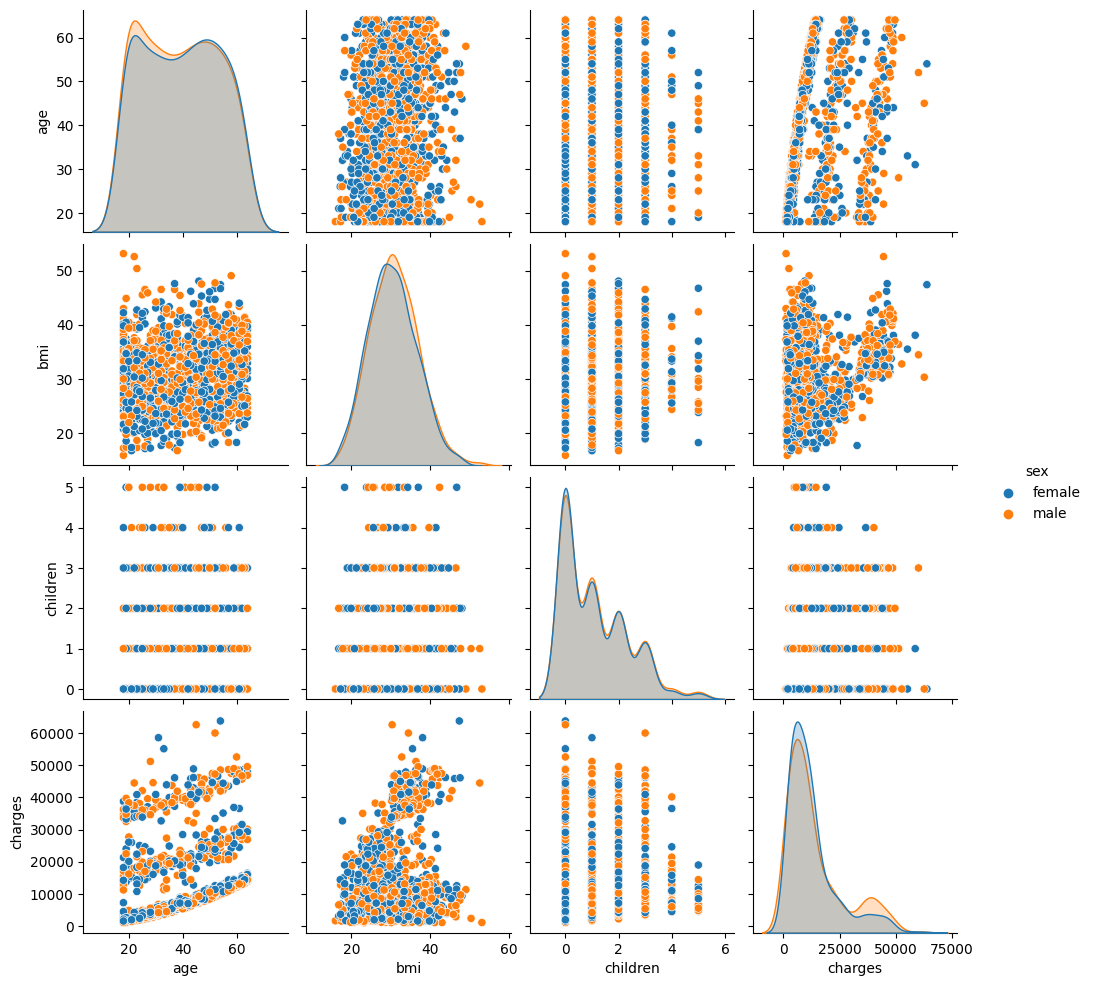

In [20]:
hue = 'sex'
sns.pairplot(numeric_data.join(data[[hue]]), hue=hue)
plt.show()

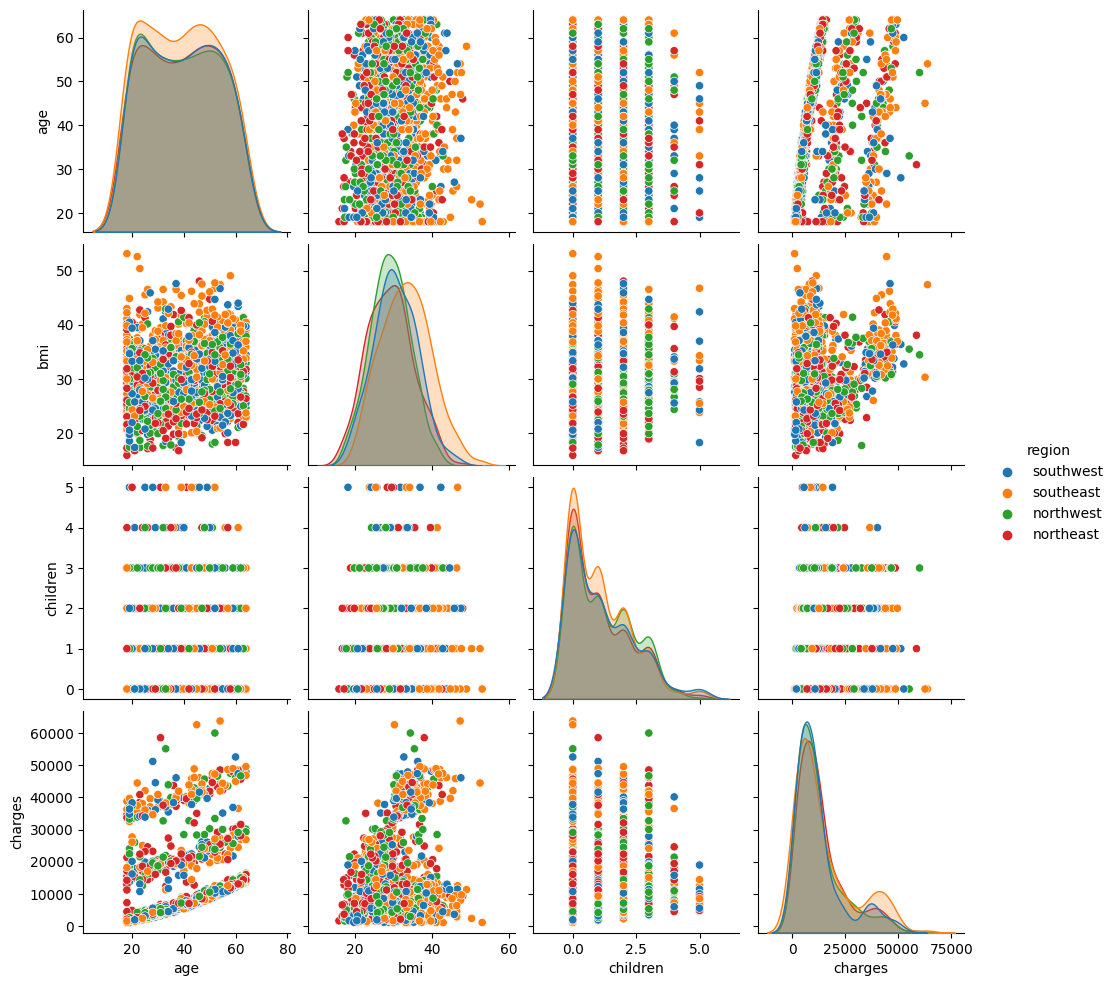

In [21]:
hue = 'region'
sns.pairplot(numeric_data.join(data[[hue]]), hue=hue)
plt.show()

### 03. Using various regression techniques for insurance premium prediction
---

#### Mapping categorical data to integer values 

In [22]:
# Import necessary encoding libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the One-Hot Encoder and Label Encoder
ohe = OneHotEncoder()
le = LabelEncoder()

# Encode the "sex" and "smoker" columns using Label Encoder
data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)

# Extract the "region" column and apply One-Hot Encoding
region = data[["region"]].values
region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region, columns=['northeast', 'northwest', 'southeast', 'southwest'])

# Drop the original "region" column and add the one-hot-encoded columns
data.drop(columns="region", axis=1, inplace=True)
data = pd.concat([data, region], axis=1)

# The DataFrame 'data' now contains encoded binary features and one-hot-encoded "region" features
data


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1333,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1334,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1335,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


#### Train-test splitting with Train: 70% and Test: 30%

In [23]:
from sklearn.model_selection import train_test_split

X_data = data.drop(columns='charges', axis = 1)
display(X_data)
y_data = data[['charges']]
display(y_data)

X_train , X_test , y_train , y_test = train_test_split(X_data,y_data, test_size=0.3)
print(X_train.shape,X_test.shape)
print(f"Rounded Result: {len(X_train) / len(X_data):.2f}")
print(f"Rounded Result: {len(X_test) / len(X_data):.2f}")

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,0.0,1.0,0.0,0.0
1333,18,0,31.920,0,0,1.0,0.0,0.0,0.0
1334,18,0,36.850,0,0,0.0,0.0,1.0,0.0
1335,21,0,25.800,0,0,0.0,0.0,0.0,1.0


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1332,10600.54830
1333,2205.98080
1334,1629.83350
1335,2007.94500


(935, 9) (402, 9)
Rounded Result: 0.70
Rounded Result: 0.30


In [24]:
X_train[0:10]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
71,31,1,28.500,5,0,1.0,0.0,0.0,0.0
1088,56,1,22.100,0,0,0.0,0.0,0.0,1.0
627,58,1,38.000,0,0,0.0,0.0,0.0,1.0
1091,23,1,32.700,3,0,0.0,0.0,0.0,1.0
911,59,0,26.695,3,0,0.0,1.0,0.0,0.0
1107,26,1,30.000,1,0,0.0,0.0,0.0,1.0
993,27,0,20.045,3,1,0.0,1.0,0.0,0.0
981,31,1,25.900,3,1,0.0,0.0,0.0,1.0
953,34,1,27.835,1,1,0.0,1.0,0.0,0.0
443,59,0,36.520,1,0,0.0,0.0,1.0,0.0


In [25]:
X_test[0:10]

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
140,34,1,22.42,2,0,1.0,0.0,0.0,0.0
77,21,1,35.53,0,0,0.0,0.0,1.0,0.0
223,19,1,34.80,0,1,0.0,0.0,0.0,1.0
287,63,0,26.22,0,0,0.0,1.0,0.0,0.0
456,55,0,30.14,2,0,0.0,0.0,1.0,0.0
1081,38,1,19.95,1,0,0.0,1.0,0.0,0.0
256,56,1,33.63,0,1,0.0,1.0,0.0,0.0
229,47,1,25.46,2,0,1.0,0.0,0.0,0.0
532,59,1,29.70,2,0,0.0,0.0,1.0,0.0
530,57,1,42.13,1,1,0.0,0.0,1.0,0.0



#### Feature Scaling
- It makes multi-dimensional values easier to compare and analyze.
- It is necessary when there are differences in the units of variables.
- It helps prevent overflow and underflow issues.

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test= s_scaler.transform(X_test)


#### Mean Squared Error (MSE) and R-squared (R2) in Regression Analysis

**Mean Squared Error (MSE):**

- *Purpose:* MSE measures the average squared difference between the predicted values and the actual (observed) values.

- *Advantages:*
  - It provides a measure of the overall precision or accuracy of the model's predictions.
  - It penalizes larger errors more than smaller ones, making it sensitive to outliers.
  - Lower MSE values indicate better model accuracy, making it useful for minimizing prediction errors.

- *Use Cases:* MSE is commonly used when assessing predictive accuracy and quantifying the magnitude of errors in predictions.

**R-squared (R2) Score:**

- *Purpose:* R2 Score measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in the model.

- *Advantages:*
  - It provides a measure of the goodness of fit, indicating how well the independent variables explain the variation in the dependent variable.
  - R2 Score ranges from 0 to 1, where 0 means the model does not explain any variance, and 1 means the model explains all the variance.
  - It is useful when understanding how well the model captures underlying patterns in the data.

- *Use Cases:* R2 Score is commonly used when assessing the model's explanatory power and how well it fits the data.

The use of both MSE and R2 Score provides a balanced view of the model's performance:

- *MSE* focuses on the accuracy of individual predictions, providing insights into how well the model predicts target values (lower MSE is better).

- *R2 Score* focuses on the overall goodness of fit and explanatory power of the model, providing insights into how well the model explains the variance in the target variable (a higher R2 Score is better).

By using both metrics, you gain a more comprehensive understanding of the model's capabilities, allowing you to assess prediction accuracy, precision, and the model's ability to capture underlying patterns in the data.


#### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model and fit it to the training data
lr = LinearRegression().fit(X_train, y_train)

# Make predictions on both the training and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test, y_test_pred)

print("----- Linear Regression Model -----")

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


----- Linear Regression Model -----
lr.coef_: [[3594.62347573   84.23791267 2143.49986795  619.49652829 9538.09724216
   262.75025882   68.11340859 -119.47145764 -205.37127281]]
lr.intercept_: [13081.94679781]
Training Data MSE: 36132006.471266136
Training Data R2 Score: 0.7485287177723243
Test Data MSE: 38414993.54507592
Test Data R2 Score: 0.7487944584170624


In [28]:
len(y_test_pred)
len(y_test)


402

#### Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Linear Regression model with polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Make predictions on both the training and test data
y_train_pred = lr_poly.predict(X_train_poly)
y_test_pred = lr_poly.predict(X_test_poly)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test, y_test_pred)

print("----- Polynomial Regression Model -----")

# Training Data MSE and R2 Score
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)

# Test Data MSE and R2 Score
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


----- Polynomial Regression Model -----
Training Data MSE: 20990144.779274065
Training Data R2 Score: 0.8539129393219209
Test Data MSE: 28163418.62845593
Test Data R2 Score: 0.8158321484269747


#### Support Vector Regression 

In [30]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create an SVR model and fit it to the training data
svr = SVR(kernel='linear',C = 300)  # You can choose a different kernel and C as needed
svr.fit(X_train, y_train.values.ravel())

# Make predictions on both the training and test data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test, y_test_pred)

print("----- Support Vector Regression (SVR) Model -----")

# Training Data MSE and R2 Score
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)

# Test Data MSE and R2 Score
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


----- Support Vector Regression (SVR) Model -----
Training Data MSE: 52310550.97803503
Training Data R2 Score: 0.635929398525271
Test Data MSE: 56575058.28267852
Test Data R2 Score: 0.630041115604763


#### Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree model and fit it to the training data
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

# Make predictions on both the training and test data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test, y_test_pred)

print("----- Decision Tree Model -----")

# Training Data MSE and R2 Score
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)

# Test Data MSE and R2 Score
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


----- Decision Tree Model -----
Training Data MSE: 279504.08897230285
Training Data R2 Score: 0.9980547094250733
Test Data MSE: 51431443.132230364
Test Data R2 Score: 0.6636765404824578


#### Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor model and fit it to the training data
rf = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of estimators as needed
rf.fit(X_train, y_train.values.ravel())

# Make predictions on both the training and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test, y_test_pred)

print("----- Random Forest Regressor Model -----")

# Training Data MSE and R2 Score
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)

# Test Data MSE and R2 Score
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


----- Random Forest Regressor Model -----
Training Data MSE: 3430746.7880282234
Training Data R2 Score: 0.9761227128510003
Test Data MSE: 27700508.146767944
Test Data R2 Score: 0.8188592393497


#### xgboost Regressor

In [33]:
from xgboost import XGBRegressor

# Create an XGBoost Regressor model and fit it to the training data
xgb = XGBRegressor(n_estimators=100, random_state=0)  # You can adjust hyperparameters as needed
xgb.fit(X_train, y_train)

# Make predictions on both the training and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test, y_test_pred)

print("----- XGBoost Regressor Model -----")

# Training Data MSE and R2 Score
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)

# Test Data MSE and R2 Score
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


----- XGBoost Regressor Model -----
Training Data MSE: 562660.7365419803
Training Data R2 Score: 0.996083997798741
Test Data MSE: 29250182.135571357
Test Data R2 Score: 0.8087255218162696


#### LightGBM Regressor

In [34]:
from lightgbm import LGBMRegressor
import os

# Create a LightGBM Regressor model and fit it to the training data
lgbm = LGBMRegressor(n_estimators=100, random_state=0, force_row_wise=True)   # You can adjust hyperparameters as needed


lgbm.fit(X_train, y_train.values.ravel())

# Make predictions on both the training and test data
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train.values.ravel(), y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train.values.ravel(), y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test.values.ravel(), y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test.values.ravel(), y_test_pred)

print("----- LightGBM Regressor Model -----")

# Training Data MSE and R2 Score
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)

# Test Data MSE and R2 Score
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 9
[LightGBM] [Info] Start training from score 13081.946797
----- LightGBM Regressor Model -----
Training Data MSE: 7460690.387346456
Training Data R2 Score: 0.9480751399869889
Test Data MSE: 27678843.048665673
Test Data R2 Score: 0.8190009130088624


c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\sjy99\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


#### Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a GradientBoostingRegressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)  # You can adjust hyperparameters as needed

# Fit the model to the training data
gbr.fit(X_train, y_train.values.ravel())

# Make predictions on both the training and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate Mean Squared Error (MSE) for the training data
train_mse = mean_squared_error(y_train.values.ravel(), y_train_pred)

# Calculate R-squared (R2) Score for the training data
train_r2 = r2_score(y_train.values.ravel(), y_train_pred)

# Calculate Mean Squared Error (MSE) for the test data
test_mse = mean_squared_error(y_test.values.ravel(), y_test_pred)

# Calculate R-squared (R2) Score for the test data
test_r2 = r2_score(y_test.values.ravel(), y_test_pred)

print("----- Gradient Boosting Regressor Model -----")

# Training Data MSE and R2 Score
print("Training Data MSE:", train_mse)
print("Training Data R2 Score:", train_r2)

# Test Data MSE and R2 Score
print("Test Data MSE:", test_mse)
print("Test Data R2 Score:", test_r2)


----- Gradient Boosting Regressor Model -----
Training Data MSE: 12760152.455872104
Training Data R2 Score: 0.9111919814901345
Test Data MSE: 25907915.35410283
Test Data R2 Score: 0.8305814655370016


#### Evaluating Each Model's R-squared Score

In [36]:
# Create a list of regressor models along with their labels
regressors = [
    (lr, 'Linear Regression'),
    (lr_poly, 'Polynomial Regression'),
    (svr, 'Support Vector Regression'),
    (rf, 'Random Forest Regression'),
    (dt, 'Decision Tree Regression'),
    (xgb, 'XGBoost Regression'),
    (lgbm, 'LightGBM Regression'),
    (gbr, 'Gradient Boosting Regression')
]

# Iterate through each regressor and evaluate its performance
for reg, label in regressors:
    print(80 * '_', '\n')
    
    # Fit the regressor to the training data
    reg = reg.fit(X_train, y_train.values.ravel())
    
    # Make predictions on both the training and test data
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    # Calculate and print the R-squared (R2) score for the training and test data
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f'{label} train R2 score: {train_r2:.3f}, {label} test R2 score: {test_r2:.3f}')


________________________________________________________________________________ 

Linear Regression train R2 score: 0.749, Linear Regression test R2 score: 0.749
________________________________________________________________________________ 

Polynomial Regression train R2 score: 0.749, Polynomial Regression test R2 score: 0.749
________________________________________________________________________________ 

Support Vector Regression train R2 score: 0.636, Support Vector Regression test R2 score: 0.630
________________________________________________________________________________ 

Random Forest Regression train R2 score: 0.976, Random Forest Regression test R2 score: 0.819
________________________________________________________________________________ 

Decision Tree Regression train R2 score: 0.998, Decision Tree Regression test R2 score: 0.664
________________________________________________________________________________ 

XGBoost Regression train R2 score: 0.996, XGBoost 


*It seems like Gradient Boosting Regression performs well, so let's proceed with hyperparameter tuning for the Gradient Boosting Regressor.*

#### Hyper Parameter

In [37]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5,6,7]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Create the final model with the best hyperparameters
final_model = GradientBoostingRegressor(random_state=0, **best_params)

# Fit the final model to the training data
final_model.fit(X_train, y_train.values.ravel())

# Evaluate the final model
y_test_pred = final_model.predict(X_test)
test_mse = mean_squared_error(y_test.values.ravel(), y_test_pred)
test_r2 = r2_score(y_test.values.ravel(), y_test_pred)

print("Test Data MSE with Best Hyperparameters:", test_mse)
print("Test Data R2 Score with Best Hyperparameters:", test_r2)



Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Test Data MSE with Best Hyperparameters: 24660303.417527508
Test Data R2 Score with Best Hyperparameters: 0.8387399214754359


#### Predict the insurance premium

In [38]:
# Print the test data predictions using the Random Forest Regression model
print("Test Data Predictions Using the Random Forest Regression Model:")
print(data.charges)
Predict_Insurance_Premium = pd.DataFrame({'Predict_Charges': y_test_pred})
display(Predict_Insurance_Premium)

Test Data Predictions Using the Random Forest Regression Model:
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64


,Predict_Charges
0,6660.299659
1,3884.763106
2,36724.881610
3,14840.187908
4,13450.299352
...,...
397,6012.320634
398,14625.533060
399,37371.035796
400,45771.382255


### 04. Conclusion
Based on the R-squared (R2) scores with models, it appears that the Gradient Boosting Regression model outperforms the other models. The Gradient Boosting Regression model has a training R2 score of 0.901 and a test R2 score of 0.870, indicating that it explains a significant portion of the variance in the target variable and generalizes well to unseen data. Therefore, we can conclude that the Gradient Boosting Regression model is the most suitable for predicting insurance premiums in this scenario.